In [101]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

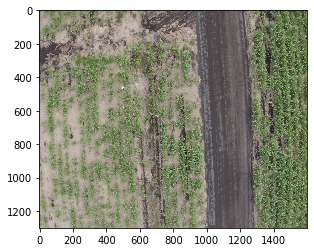

In [158]:
img = cv2.imread('DJI_0010.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

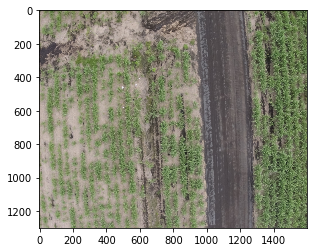

In [103]:
img = cv2.blur(img, (3,3))
plt.imshow(img)

In [104]:
# Rangos deteccion de color verde

bajos_verde = np.array([0,100,0])
altos_verde = np.array([100,255,100])

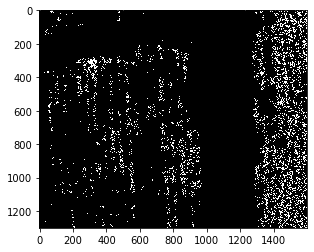

In [159]:
# Deteccion color verde
mask = cv2.inRange(img, bajos_verde, altos_verde)
cv2.imwrite('mask.jpg', mask)
plt.imshow(mask, cmap='gray')

In [106]:
thinned = cv2.ximgproc.thinning(mask)

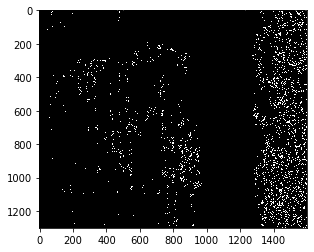

In [107]:
plt.imshow(thinned, cmap='gray')

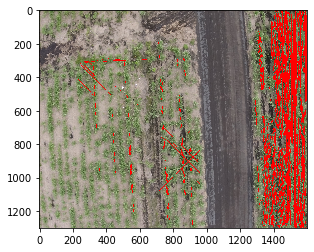

In [133]:
#edges = cv2.Canny(mask, 50, 10, apertureSize = 3)
lines2 = cv2.HoughLinesP(mask, 1, np.pi/180, 150, minLineLength=10, maxLineGap=50)

for line in lines2:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 1)
    
cv2.imwrite('houghlines.jpg', img)
plt.imshow(img)

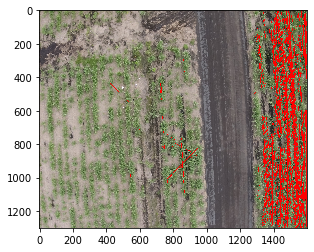

In [139]:
#edges = cv2.Canny(mask, 50, 10, apertureSize = 3)
lines2 = cv2.HoughLinesP(thinned, 1, np.pi/180, 100, minLineLength=10, maxLineGap=50)

for line in lines2:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 1)
    
cv2.imwrite('houghlines.jpg', img)
plt.imshow(img)

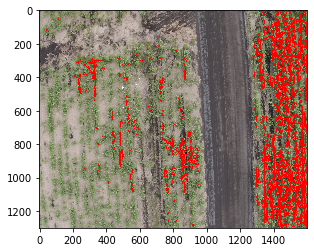

In [146]:
#edges = cv2.Canny(mask, 50, 10, apertureSize = 3)
lines2 = cv2.HoughLinesP(mask, 1, np.pi/180, 75, minLineLength=5, maxLineGap=25)

for line in lines2:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 1)
    
cv2.imwrite('houghlines.jpg', img)
plt.imshow(img)

# Transformaciones morfologicas

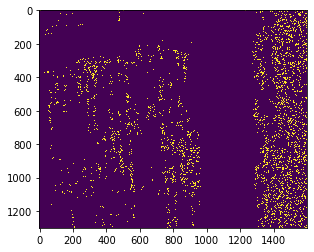

In [160]:
# SKELETONIZATION

# Step 1: Create an empty skeleton
size = np.size(mask)
skel = np.zeros(mask.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(mask, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(mask, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(mask, element)
    skel = cv2.bitwise_or(skel,temp)
    mask = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(mask)==0:
        break

# Displaying the final skeleton
plt.imshow(skel)

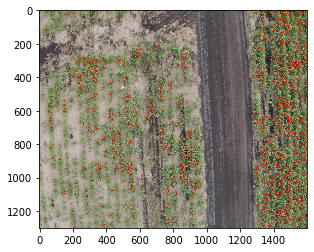

In [161]:
#edges = cv2.Canny(mask2, 50, 10, apertureSize = 3)
lines2 = cv2.HoughLinesP(skel, 1, np.pi/180, 10, minLineLength=1, maxLineGap=1)

for line in lines2:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 1)
    
cv2.imwrite('houghlines.jpg', img)
plt.imshow(img)

In [147]:
kernel = np.ones((5,5),np.uint8)

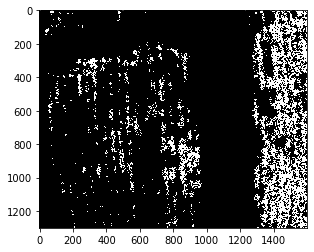

In [148]:
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('closing.jpg', closing)
plt.imshow(closing,cmap='gray')

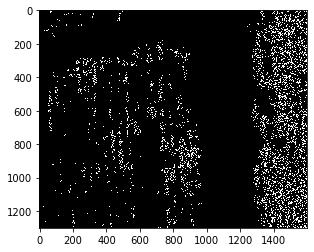

In [149]:
bordes_sobelx = cv2.Sobel(mask, cv2.CV_8U, 1, 0, ksize=3)

#cv2.imwrite('sobelOCV.jpg', bordes_sobelx)
#sobelOCVx = cv2.imread('sobelOCV.jpg')
plt.imshow(bordes_sobelx, cmap='gray') 

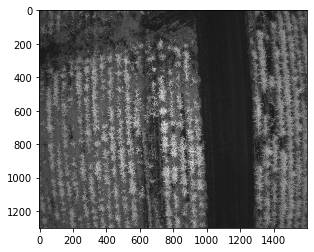

In [172]:
img = cv2.imread('DJI_0015.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

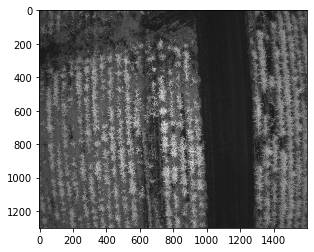

In [163]:
kernel = np.ones((5,5),np.float32)/20
dst = cv2.filter2D(img,-1,kernel)
cv2.imwrite('filtro.jpg', dst)
plt.imshow(img)

In [164]:
# Rangos deteccion de color blanco

bajos_blanco = np.array([110,110,110])
altos_blanco = np.array([255,255,255])

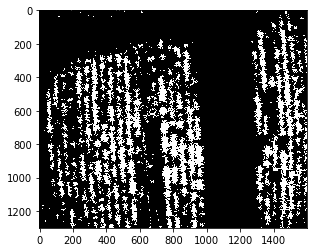

In [165]:
# Deteccion color blanco
mask2 = cv2.inRange(img, bajos_blanco, altos_blanco)
cv2.imwrite('mask2.jpg', mask2)
plt.imshow(mask2, cmap='gray')

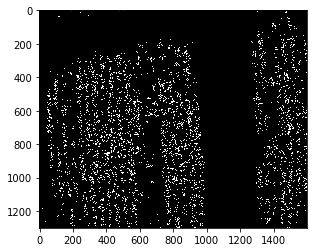

In [166]:
thinned = cv2.ximgproc.thinning(mask2)
plt.imshow(thinned,cmap='gray')

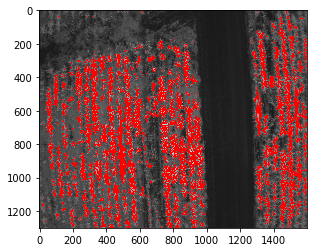

In [167]:
#edges = cv2.Canny(mask2, 50, 10, apertureSize = 3)
lines2 = cv2.HoughLinesP(mask2, 1, np.pi/180, 10, minLineLength=1, maxLineGap=10)

for line in lines2:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 1)
    
cv2.imwrite('houghlines.jpg', img)
plt.imshow(img)

In [168]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(mask2,kernel,iterations = 1)

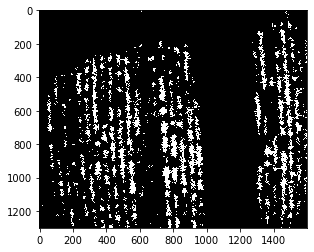

In [169]:
cv2.imwrite('erosion.jpg', erosion)
plt.imshow(erosion, cmap='gray')

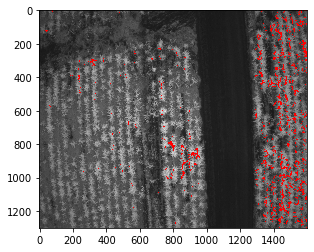

In [173]:
#edges = cv2.Canny(mask2, 50, 10, apertureSize = 3)
lines2 = cv2.HoughLinesP(erosion, 1, np.pi/180, 10, minLineLength=1, maxLineGap=10)

for line in lines2:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 1)
    
cv2.imwrite('houghlines.jpg', img)
plt.imshow(img)

In [170]:
erosion = cv2.erode(closing,kernel,iterations = 3)

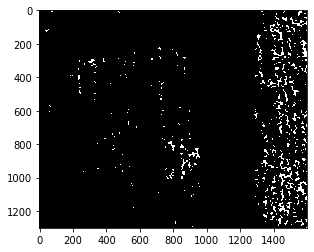

In [171]:
cv2.imwrite('erosion.jpg', erosion)
plt.imshow(erosion, cmap='gray')

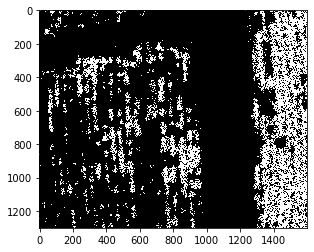

In [88]:
dilation = cv2.dilate(closing,kernel,iterations = 1)
cv2.imwrite('dilation.jpg', dilation)
plt.imshow(dilation, cmap='gray')

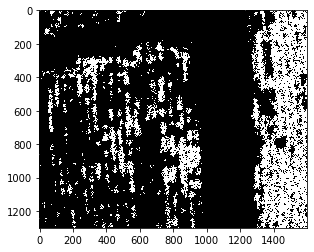

In [89]:
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('closing.jpg', closing)
plt.imshow(closing, cmap='gray')

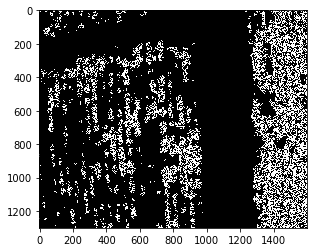

In [99]:
gradient = cv2.morphologyEx(dilation, cv2.MORPH_GRADIENT, kernel)
cv2.imwrite('gradient.jpg', gradient)
plt.imshow(gradient, cmap='gray')